In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data2 = pd.read_csv('COVID-19_Vaccinations_in_the_United_States_Jurisdiction.csv')

In [3]:
data2

,Date,MMWR_week,Location,Distributed,Distributed_Janssen,Distributed_Moderna,Distributed_Pfizer,Distributed_Unk_Manuf,Dist_Per_100K,Distributed_Per_100k_5Plus,...,Additional_Doses_Unk_Manuf,Second_Booster,Second_Booster_50Plus,Second_Booster_50Plus_Vax_Pct,Second_Booster_65Plus,Second_Booster_65Plus_Vax_Pct,Second_Booster_Janssen,Second_Booster_Moderna,Second_Booster_Pfizer,Second_Booster_Unk_Manuf
0,06/22/2022,25,MA,17767210,621000,6748120,10398090,0,257776,271872.0,...,34.0,NaN,477501.0,29.8,317336.0,38.4,206.0,251489.0,249036.0,7.0
1,06/22/2022,25,NC,23200600,936100,8742860,13521640,0,221209,234864.0,...,38.0,NaN,205607.0,17.8,141350.0,21.5,132.0,107914.0,106125.0,6.0
2,06/22/2022,25,CO,13161275,495300,4807840,7858135,0,228545,242536.0,...,865.0,NaN,404951.0,34.6,266310.0,43.3,323.0,192880.0,235717.0,288.0
3,06/22/2022,25,ND,1462800,53200,556620,852980,0,191953,206622.0,...,9.0,NaN,17068.0,14.1,12642.0,17.3,4.0,7958.0,9830.0,1.0
4,06/22/2022,25,CA,94594155,3740300,33912480,56941375,0,239405,254775.0,...,624.0,NaN,2511047.0,30.9,1589821.0,38.6,1985.0,1360252.0,1316288.0,64.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35539,12/13/2020,51,GU,3900,0,0,0,0,2353,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35540,12/13/2020,51,VI,975,0,0,0,0,931,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35541,12/13/2020,51,MP,4875,0,0,0,0,8570,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35542,12/13/2020,51,LTC,0,0,0,0,0,0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data2_nec = data2[['Date', 'Location', 'Administered', 'Administered_12Plus',  'Administered_18Plus', 'Administered_65Plus', 'Additional_Doses_12Plus', 'Additional_Doses_18Plus', 'Additional_Doses_50Plus', 'Additional_Doses_65Plus']]

In [5]:
data2_nec['Administered_diff'] = data2_nec['Administered'].diff().fillna(0)
data2_nec['Administered_12Plus_diff'] = data2_nec['Administered_12Plus'].diff().fillna(0)
data2_nec['Administered_18Plus_diff'] = data2_nec['Administered_18Plus'].diff().fillna(0)
data2_nec['Administered_65Plus_diff'] = data2_nec['Administered_65Plus'].diff().fillna(0)

data2_nec = data2_nec[data2_nec['Administered_diff'] >= 0.0]
data2_nec = data2_nec[data2_nec['Administered_12Plus_diff'] >= 0.0]
data2_nec = data2_nec[data2_nec['Administered_18Plus_diff'] >= 0.0]
data2_nec = data2_nec[data2_nec['Administered_65Plus_diff'] >= 0.0]


<ipython-input-5-676488a63300>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2_nec['Administered_diff'] = data2_nec['Administered'].diff().fillna(0)
<ipython-input-5-676488a63300>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2_nec['Administered_12Plus_diff'] = data2_nec['Administered_12Plus'].diff().fillna(0)
<ipython-input-5-676488a63300>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

In [6]:
data_dem2 = pd.read_excel('demog.xlsx')

In [7]:
data_state = pd.read_excel('state.xlsx')

In [8]:
state_series = data_state['state'].squeeze()

In [9]:
def get_info(XX, state, df2, b):
    listo = list(date_series_str)
    for x in listo:
        df = df2[df2['Date'] == XX] 
        df = df[df['Location'] == state]
        a = df[b]
        if df.size == 0:
            return float('nan')
        else:
            return a.squeeze()

In [10]:
def get_pop(state, df2, b):
    listo = list(state_series)
    for x in listo:
        df = df2[df2['state'] == state] 
        a = df[b]
        if df.size == 0:
            return float('nan')
        else:
            return a.squeeze()

In [11]:
get_pop('US', data_dem2, '65+')

52784300

In [12]:
data_date = pd.read_excel('date-vacc.xlsx')

In [13]:
date_series = data_date['date'].squeeze()
date_series_str = date_series.dt.strftime('%m/%d/%Y')

In [14]:
date_series_str

0      02/07/2022
1      02/08/2022
2      02/09/2022
3      02/10/2022
4      02/11/2022
          ...    
589    09/19/2023
590    09/20/2023
591    09/21/2023
592    09/22/2023
593    09/23/2023
Name: date, Length: 594, dtype: object

In [15]:
deb_date = '02/07/2022'
mid_date = '04/21/2022'
end_date = '06/22/2022'

old_date = '26/11/2021'
oldd_date = '25/12/2021'

state = 'US'
data_dem = (get_pop(state, data_dem2, '0_4'), get_pop(state, data_dem2, '5_11'), get_pop(state, data_dem2, '12_18'), get_pop(state, data_dem2, '19_49'), get_pop(state, data_dem2, '50_64'), get_pop(state, data_dem2, '65+'))

In [16]:
data_dem

(23533718.75,
 32947206.25,
 18826975,
 127653910.526316,
 63503489.4736842,
 52784300)

In [17]:
def primary(state):
    doses_series = pd.DataFrame(columns = ['date', '0_4', '5_11', '12_18', '19_49', '50_64', '65+'])
    cov_65 = 0
    cov_50_64 = 0
    cov_19_49 = 0
    cov_12_18 = 0
    cov_5_11 = 0

    i = 0
    deb_65 = get_info(deb_date, state, data2_nec, 'Administered_65Plus') 
    mid_65 = get_info(mid_date, state, data2_nec, 'Administered_65Plus') 
    fin_65 = get_info(end_date, state, data2_nec, 'Administered_65Plus') 

    deb_50_64 = (get_info(deb_date, state, data2_nec, 'Administered_18Plus') - get_info(deb_date, state, data2_nec, 'Administered_65Plus'))*(data_dem[4]/(data_dem[3] + data_dem[5])) 
    mid_50_64 = (get_info(mid_date, state, data2_nec, 'Administered_18Plus') - get_info(mid_date, state, data2_nec, 'Administered_65Plus'))*(data_dem[4]/(data_dem[3] + data_dem[5])) 
    fin_50_64 = (get_info(end_date, state, data2_nec, 'Administered_18Plus') - get_info(end_date, state, data2_nec, 'Administered_65Plus'))*(data_dem[4]/(data_dem[3] + data_dem[5]))  

    deb_19_49 = (get_info(deb_date, state, data2_nec, 'Administered_18Plus') - get_info(deb_date, state, data2_nec, 'Administered_65Plus'))*(data_dem[3]/(data_dem[3] + data_dem[5])) 
    mid_19_49 = (get_info(mid_date, state, data2_nec, 'Administered_18Plus') - get_info(mid_date, state, data2_nec, 'Administered_65Plus'))*(data_dem[3]/(data_dem[3] + data_dem[5]))  
    fin_19_49 = (get_info(end_date, state, data2_nec, 'Administered_18Plus') - get_info(end_date, state, data2_nec, 'Administered_65Plus'))*(data_dem[3]/(data_dem[3] + data_dem[5]))  

    deb_12_18 = (get_info(deb_date, state, data2_nec, 'Administered_12Plus') - get_info(deb_date, state, data2_nec, 'Administered_18Plus'))
    fin_12_18 = (get_info(mid_date, state, data2_nec, 'Administered_12Plus') - get_info(end_date, state, data2_nec, 'Administered_18Plus')) 
    fin_12_18 = (get_info(end_date, state, data2_nec, 'Administered_12Plus') - get_info(end_date, state, data2_nec, 'Administered_18Plus')) 


    deb_5_11 = (get_info(deb_date, state, data2_nec, 'Administered') - get_info(deb_date, state, data2_nec, 'Administered_12Plus'))
    fin_5_11 = (get_info(mid_date, state, data2_nec, 'Administered') - get_info(end_date, state, data2_nec, 'Administered_12Plus')) 
    fin_5_11 = (get_info(end_date, state, data2_nec, 'Administered') - get_info(end_date, state, data2_nec, 'Administered_12Plus')) 


    dif_65 = fin_65 - deb_65
    dif_50_64 = fin_50_64 - deb_50_64
    dif_19_49 = fin_19_49 - deb_19_49
    dif_12_18 = fin_12_18 - deb_12_18
    dif_5_11 = fin_5_11 - deb_5_11
    
    
    print(dif_65)

    for date in date_series_str:    
        if (i < 135):   

            cov_65 = deb_65 + i*dif_65/160
            cov_50_64 = deb_50_64 + i*dif_50_64/80
            cov_19_49 = deb_19_49 + i*dif_19_49/80
            cov_12_18 = deb_12_18 + i*dif_12_18/80
            cov_5_11 = deb_5_11 + i*dif_5_11/80

            i = i + 1                                                                                         
        else:
            old_cov_65 = cov_65
            old_cov_50_64 = cov_50_64
            old_cov_19_49 = cov_19_49
            old_cov_12_18 = cov_12_18
            old_cov_5_11 = cov_5_11


            cov_65 = old_cov_65

            if (old_cov_50_64 + dif_50_64/80 <= 2*0.88*data_dem[4]):
                cov_50_64 = old_cov_50_64 + dif_50_64/80
            else:
                cov_50_64 = old_cov_50_64

            if (old_cov_19_49 + dif_19_49/80 <= 2*0.9*data_dem[3]):
                cov_19_49 = old_cov_19_49 + dif_19_49/80
            else:
                cov_19_49 = old_cov_19_49

            if (old_cov_12_18 + dif_12_18/80 <= 2*0.80*data_dem[2]):
                cov_12_18 = old_cov_12_18 + dif_12_18/80
            else:
                cov_12_18 =  old_cov_12_18


            if (old_cov_5_11 + dif_5_11 <= 2*0.5*data_dem[1]):
                cov_5_11 = old_cov_5_11 + dif_5_11/80
            else:
                cov_5_11 =  old_cov_5_11



            i = i + 1
            print(i)
        if (i % 1000 == 0):
            print(i)
        doses_series = doses_series.append({'date' : date, '0_4' : 0, '5_11' : cov_5_11, '12_18' : cov_12_18, '19_49' : cov_19_49, '50_64' : cov_50_64, '65+' : cov_65}, 
                    ignore_index = True)
        
    doses_series['65_diff'] = doses_series['65+'].diff().fillna(0)
    doses_series['50_64_diff'] = doses_series['50_64'].diff().fillna(0)
    doses_series['19_49_diff'] = doses_series['19_49'].diff().fillna(0)
    doses_series['12_18_diff'] = doses_series['12_18'].diff().fillna(0)
    doses_series['5_11_diff'] = doses_series['5_11'].diff().fillna(0) 
    return doses_series

In [18]:
def booster(state):
    booster_doses2 = pd.DataFrame(columns = ['date', '0_4', '5_11', '12_18', '19_49', '50_64', '65+'])
    i = 0
    dd1_65 =  get_info(deb_date, state, data2_nec, 'Additional_Doses_65Plus')     
    dd2_65 =  get_info(end_date, state, data2_nec, 'Additional_Doses_65Plus')        
    
    dd1_50_64 =  get_info(deb_date, state, data2_nec, 'Additional_Doses_50Plus') - dd1_65
    dd2_50_64 =  get_info(end_date, state, data2_nec, 'Additional_Doses_50Plus') - dd2_65
    
    dd1_19_49 = get_info(deb_date, state, data2_nec, 'Additional_Doses_18Plus') - get_info(deb_date, state, data2_nec, 'Additional_Doses_50Plus')
    dd2_19_49 = get_info(end_date, state, data2_nec, 'Additional_Doses_18Plus') - get_info(end_date, state, data2_nec, 'Additional_Doses_50Plus')

    
    dd1_12_18 = get_info(deb_date, state, data2_nec, 'Additional_Doses_12Plus') - get_info(deb_date, state, data2_nec, 'Additional_Doses_18Plus')
    dd2_12_18 = get_info(end_date, state, data2_nec, 'Additional_Doses_12Plus') - get_info(end_date, state, data2_nec, 'Additional_Doses_18Plus')
    

    dif_65 = dd2_65 - dd1_65
    dif_50_64 = dd2_50_64 - dd1_50_64
    dif_19_49 = dd2_19_49 - dd1_19_49
    dif_12_18 = dd2_12_18 - dd1_12_18

    for date in date_series_str:    
        if (i < 135):
            cov_65 = dd1_65 + i*dif_65/80
            cov_50_64 = dd1_50_64 + i*dif_50_64/80
            cov_19_49 = dd1_19_49 + i*dif_19_49/80
            cov_12_18 = dd1_12_18 + i*dif_12_18/80
            i = i + 1  
            
        else:
            
            old_cov_65 = cov_65
            old_cov_50_64 = cov_50_64
            old_cov_19_49 = cov_19_49
            old_cov_12_18 = cov_12_18

            if (old_cov_65 + dif_65/80 <= 0.7*0.9*data_dem[5]):
                cov_65 = old_cov_65 + dif_65/80
            else:
                cov_65 = old_cov_65

            if (old_cov_50_64 + dif_50_64/80 <=  0.7*0.9*data_dem[4]):
                cov_50_64 = old_cov_50_64 + dif_50_64/80
            else:
                cov_50_64 = old_cov_50_64

            if (old_cov_19_49 + dif_19_49/80 <= 0.7*0.88*data_dem[3]):
                cov_19_49 = old_cov_19_49 + dif_19_49/80
            else:
                cov_19_49 = old_cov_19_49

            if (old_cov_12_18 + dif_12_18/80 <= 0.7*0.80*data_dem[2]):
                cov_12_18 = old_cov_12_18 + dif_12_18/80
            else:
                cov_12_18 =  old_cov_12_18
               
                
            i = i + 1
            
            
        if (i % 1000 == 0):
            print(i)
        booster_doses2 = booster_doses2.append({'date' : date, '0_4' : 0, '5_11' : 0, '12_18' : cov_12_18, '19_49' : cov_19_49, '50_64' : cov_50_64, '65+' : cov_65}, 
                ignore_index = True)
        
    booster_doses2['65_diff'] = booster_doses2['65+'].diff().fillna(0)
    booster_doses2['50_64_diff'] = booster_doses2['50_64'].diff().fillna(0)
    booster_doses2['19_49_diff'] = booster_doses2['19_49'].diff().fillna(0)
    booster_doses2['12_18_diff'] = booster_doses2['12_18'].diff().fillna(0)
    booster_doses2['5_11_diff'] = booster_doses2['5_11'].diff().fillna(0) 
    return booster_doses2

In [19]:
def booster2(state):
    booster_doses3 = pd.DataFrame(columns = ['date', '0_4', '5_11', '12_18', '19_49', '50_64', '65+'])
    i = 0
    dd1_65 =  get_info(deb_date, state, data2_nec, 'Additional_Doses_65Plus')     
    dd2_65 =  get_info(end_date, state, data2_nec, 'Additional_Doses_65Plus')        
    
    dd1_50_64 =  get_info(deb_date, state, data2_nec, 'Additional_Doses_50Plus') - dd1_65
    dd2_50_64 =  get_info(end_date, state, data2_nec, 'Additional_Doses_50Plus') - dd2_65
    
    dd1_19_49 = get_info(deb_date, state, data2_nec, 'Additional_Doses_18Plus') - get_info(deb_date, state, data2_nec, 'Additional_Doses_50Plus')
    dd2_19_49 = get_info(end_date, state, data2_nec, 'Additional_Doses_18Plus') - get_info(end_date, state, data2_nec, 'Additional_Doses_50Plus')

    
    dd1_12_18 = get_info(deb_date, state, data2_nec, 'Additional_Doses_12Plus') - get_info(deb_date, state, data2_nec, 'Additional_Doses_18Plus')
    dd2_12_18 = get_info(end_date, state, data2_nec, 'Additional_Doses_12Plus') - get_info(end_date, state, data2_nec, 'Additional_Doses_18Plus')
    

    dif_65 = dd2_65 - dd1_65
    dif_50_64 = dd2_50_64 - dd1_50_64
    dif_19_49 = dd2_19_49 - dd1_19_49
    dif_12_18 = dd2_12_18 - dd1_12_18

    for date in date_series_str:    
        if (i < 135):
            cov_65 = dd1_65 + i*dif_65/80
            cov_50_64 = dd1_50_64 + i*dif_50_64/80
            cov_19_49 = dd1_19_49 + i*dif_19_49/80
            cov_12_18 = dd1_12_18 + i*dif_12_18/80
            i = i + 1  
            
        else:
            
            if (i < 145):
                old_cov_65 = cov_65
                old_cov_50_64 = cov_50_64
                old_cov_19_49 = cov_19_49
                old_cov_12_18 = cov_12_18

                if (old_cov_65 + dif_65/80 <= 0.7*0.9*data_dem[5]):
                    cov_65 = old_cov_65 + dif_65/80
                else:
                    cov_65 = old_cov_65

                if (old_cov_50_64 + dif_50_64/80 <=  0.7*0.9*data_dem[4]):
                    cov_50_64 = old_cov_50_64 + dif_50_64/80
                else:
                    cov_50_64 = old_cov_50_64

                if (old_cov_19_49 + dif_19_49/80 <= 0.7*0.88*data_dem[3]):
                    cov_19_49 = old_cov_19_49 + dif_19_49/80
                else:
                    cov_19_49 = old_cov_19_49

                if (old_cov_12_18 + dif_12_18/80 <= 0.7*0.80*data_dem[2]):
                    cov_12_18 = old_cov_12_18 + dif_12_18/80
                else:
                    cov_12_18 =  old_cov_12_18


                i = i + 1
                
            else:
                cof = 2.5
                old_cov_65 = cov_65
                old_cov_50_64 = cov_50_64
                old_cov_19_49 = cov_19_49
                old_cov_12_18 = cov_12_18

                if (old_cov_65 + cof*dif_65/80 <= 0.7*0.9*data_dem[5]):
                    cov_65 = old_cov_65 + cof*dif_65/80
                else:
                    cov_65 = old_cov_65

                if (old_cov_50_64 + cof*dif_50_64/80 <=  0.7*0.9*data_dem[4]):
                    cov_50_64 = old_cov_50_64 + cof*dif_50_64/80
                else:
                    cov_50_64 = old_cov_50_64

                if (old_cov_19_49 + cof*dif_19_49/80 <= 0.7*0.88*data_dem[3]):
                    cov_19_49 = old_cov_19_49 + cof*dif_19_49/80
                else:
                    cov_19_49 = old_cov_19_49

                if (old_cov_12_18 + cof*dif_12_18/80 <= 0.7*0.80*data_dem[2]):
                    cov_12_18 = old_cov_12_18 + cof*dif_12_18/80
                else:
                    cov_12_18 =  old_cov_12_18


                i = i + 1
            
            
        if (i % 1000 == 0):
            print(i)
        booster_doses3 = booster_doses3.append({'date' : date, '0_4' : 0, '5_11' : 0, '12_18' : cov_12_18, '19_49' : cov_19_49, '50_64' : cov_50_64, '65+' : cov_65}, 
                ignore_index = True)
        
    booster_doses3['65_diff'] = booster_doses3['65+'].diff().fillna(0)
    booster_doses3['50_64_diff'] = booster_doses3['50_64'].diff().fillna(0)
    booster_doses3['19_49_diff'] = booster_doses3['19_49'].diff().fillna(0)
    booster_doses3['12_18_diff'] = booster_doses3['12_18'].diff().fillna(0)
    booster_doses3['5_11_diff'] = booster_doses3['5_11'].diff().fillna(0) 
    return booster_doses3

In [20]:
def booster3(state):
    booster_doses4 = pd.DataFrame(columns = ['date', '0_4', '5_11', '12_18', '19_49', '50_64', '65+'])
    i = 0
    dd1_65 =  get_info(deb_date, state, data2_nec, 'Additional_Doses_65Plus')     
    dd2_65 =  get_info(end_date, state, data2_nec, 'Additional_Doses_65Plus')        
    
    dd1_50_64 =  get_info(deb_date, state, data2_nec, 'Additional_Doses_50Plus') - dd1_65
    dd2_50_64 =  get_info(end_date, state, data2_nec, 'Additional_Doses_50Plus') - dd2_65
    
    dd1_19_49 = get_info(deb_date, state, data2_nec, 'Additional_Doses_18Plus') - get_info(deb_date, state, data2_nec, 'Additional_Doses_50Plus')
    dd2_19_49 = get_info(end_date, state, data2_nec, 'Additional_Doses_18Plus') - get_info(end_date, state, data2_nec, 'Additional_Doses_50Plus')

    
    dd1_12_18 = get_info(deb_date, state, data2_nec, 'Additional_Doses_12Plus') - get_info(deb_date, state, data2_nec, 'Additional_Doses_18Plus')
    dd2_12_18 = get_info(end_date, state, data2_nec, 'Additional_Doses_12Plus') - get_info(end_date, state, data2_nec, 'Additional_Doses_18Plus')
    

    dif_65 = dd2_65 - dd1_65
    dif_50_64 = dd2_50_64 - dd1_50_64
    dif_19_49 = dd2_19_49 - dd1_19_49
    dif_12_18 = dd2_12_18 - dd1_12_18

    for date in date_series_str:    
        if (i < 135):
            cov_65 = dd1_65 + i*dif_65/80
            cov_50_64 = dd1_50_64 + i*dif_50_64/80
            cov_19_49 = dd1_19_49 + i*dif_19_49/80
            cov_12_18 = dd1_12_18 + i*dif_12_18/80
            i = i + 1  
            
        else:
            
            if (i < 159):
                old_cov_65 = cov_65
                old_cov_50_64 = cov_50_64
                old_cov_19_49 = cov_19_49
                old_cov_12_18 = cov_12_18

                if (old_cov_65 + dif_65/80 <= 0.7*0.9*data_dem[5]):
                    cov_65 = old_cov_65 + dif_65/80
                else:
                    cov_65 = old_cov_65

                if (old_cov_50_64 + dif_50_64/80 <=  0.7*0.9*data_dem[4]):
                    cov_50_64 = old_cov_50_64 + dif_50_64/80
                else:
                    cov_50_64 = old_cov_50_64

                if (old_cov_19_49 + dif_19_49/80 <= 0.7*0.88*data_dem[3]):
                    cov_19_49 = old_cov_19_49 + dif_19_49/80
                else:
                    cov_19_49 = old_cov_19_49

                if (old_cov_12_18 + dif_12_18/80 <= 0.7*0.80*data_dem[2]):
                    cov_12_18 = old_cov_12_18 + dif_12_18/80
                else:
                    cov_12_18 =  old_cov_12_18


                i = i + 1
                
            else:
                cof = 2.5
                old_cov_65 = cov_65
                old_cov_50_64 = cov_50_64
                old_cov_19_49 = cov_19_49
                old_cov_12_18 = cov_12_18

                if (old_cov_65 + cof*dif_65/80 <= 0.7*0.9*data_dem[5]):
                    cov_65 = old_cov_65 + cof*dif_65/80
                else:
                    cov_65 = old_cov_65

                if (old_cov_50_64 + cof*dif_50_64/80 <=  0.7*0.9*data_dem[4]):
                    cov_50_64 = old_cov_50_64 + cof*dif_50_64/80
                else:
                    cov_50_64 = old_cov_50_64

                if (old_cov_19_49 + cof*dif_19_49/80 <= 0.7*0.88*data_dem[3]):
                    cov_19_49 = old_cov_19_49 + cof*dif_19_49/80
                else:
                    cov_19_49 = old_cov_19_49

                if (old_cov_12_18 + cof*dif_12_18/80 <= 0.7*0.80*data_dem[2]):
                    cov_12_18 = old_cov_12_18 + cof*dif_12_18/80
                else:
                    cov_12_18 =  old_cov_12_18


                i = i + 1
            
            
            
        if (i % 1000 == 0):
            print(i)
        booster_doses4 = booster_doses4.append({'date' : date, '0_4' : 0, '5_11' : 0, '12_18' : cov_12_18, '19_49' : cov_19_49, '50_64' : cov_50_64, '65+' : cov_65}, 
                ignore_index = True)
        
    booster_doses4['65_diff'] = booster_doses4['65+'].diff().fillna(0)
    booster_doses4['50_64_diff'] = booster_doses4['50_64'].diff().fillna(0)
    booster_doses4['19_49_diff'] = booster_doses4['19_49'].diff().fillna(0)
    booster_doses4['12_18_diff'] = booster_doses4['12_18'].diff().fillna(0)
    booster_doses4['5_11_diff'] = booster_doses4['5_11'].diff().fillna(0) 
    return booster_doses4

In [21]:
booster_doses2 = booster('US')
booster_doses3 = booster2('US')
booster_doses4 = booster3('US')


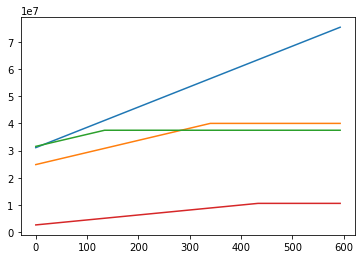

In [22]:
plt.plot(booster_doses2['19_49'])
plt.plot(booster_doses2['50_64'])
plt.plot(booster_doses2['65+'])
plt.plot(booster_doses2['12_18'])

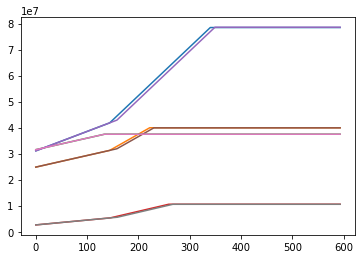

In [23]:
plt.plot(booster_doses3['19_49'])
plt.plot(booster_doses3['50_64'])
plt.plot(booster_doses3['65+'])
plt.plot(booster_doses3['12_18'])


plt.plot(booster_doses4['19_49'])
plt.plot(booster_doses4['50_64'])
plt.plot(booster_doses4['65+'])
plt.plot(booster_doses4['12_18'])

In [24]:
booster_doses2['65_diff'] = booster_doses2['65+'].diff().fillna(0)
booster_doses2['50_64_diff'] = booster_doses2['50_64'].diff().fillna(0)
booster_doses2['19_49_diff'] = booster_doses2['19_49'].diff().fillna(0)
booster_doses2['12_18_diff'] = booster_doses2['12_18'].diff().fillna(0)
booster_doses2['5_11_diff'] = booster_doses2['5_11'].diff().fillna(0) 

In [25]:
def set_vacc(state):
    deb_date = '02/07/2022'
    mid_date = '02/21/2022'
    end_date = '04/25/2022'
    data_dem = (get_pop(state, data_dem2, '0_4'), get_pop(state, data_dem2, '5_11'), get_pop(state, data_dem2, '12_18'), get_pop(state, data_dem2, '19_49'), get_pop(state, data_dem2, '50_64'), get_pop(state, data_dem2, '65+'))
    primary_series = primary(state)
    booster_dose = booster(state)
    booster_dose2 = booster2(state)
    booster_dose3 = booster3(state)
    return primary_series, booster_dose, booster_dose2, booster_dose3

In [26]:
primary_series, booster_dose, booster_dose2, booster_dose3 = set_vacc('US')

18140823
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353
354
355
356
357
358
359
360
361
362
363
364
365
366
367
368
369
370
371
372
373
374
375
376
377
378
379
380
381
382
383

In [27]:
#primary_series.to_csv('')

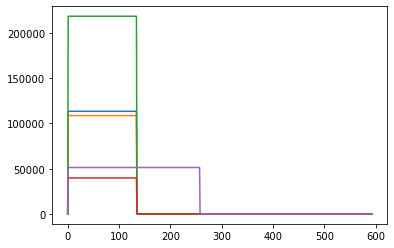

In [27]:

plt.plot(primary_series['65_diff'])

plt.plot(primary_series['50_64_diff'])

plt.plot(primary_series['19_49_diff'])
plt.plot(primary_series['12_18_diff'])
plt.plot(primary_series['5_11_diff'])

In [28]:
primary_series.to_csv('us_prim.csv')
booster_dose.to_csv('us_boost1.csv')
booster_dose2.to_csv('us_boost2.csv')
booster_dose3.to_csv('us_boost3.csv')